In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
df=pd.read_csv("Housing.csv")

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
#shaoe of dataset
print("Shape",df.shape)

Shape (545, 13)


In [15]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [17]:
print("\n Numerical Description")
df.describe()


 Numerical Description


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
print("\n Categorical description")
df.describe(include=['object'])


 Categorical description


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [21]:
print("Missing Values")
df.isnull().sum()

Missing Values


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
num_cols=['price','area','bedrooms','bathrooms','stories','parking']
cat_cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea',
          'furnishingstatus']

In [25]:
# 2) Numerical summary (with extra stats) 
num_summary = df[num_cols].agg(['count', 'mean', 'std', 'min', 'median', 'max']).T
num_summary['skew'] = df[num_cols].skew(numeric_only=True)
num_summary['q01'] = df[num_cols].quantile(0.01)
num_summary['q99'] = df[num_cols].quantile(0.99)
print("\n=== Numerical Summary ===")
print(num_summary.round(2))


=== Numerical Summary ===
           count        mean         std        min     median         max  \
price      545.0  4766729.25  1870439.62  1750000.0  4340000.0  13300000.0   
area       545.0     5150.54     2170.14     1650.0     4600.0     16200.0   
bedrooms   545.0        2.97        0.74        1.0        3.0         6.0   
bathrooms  545.0        1.29        0.50        1.0        1.0         4.0   
stories    545.0        1.81        0.87        1.0        2.0         4.0   
parking    545.0        0.69        0.86        0.0        0.0         3.0   

           skew        q01         q99  
price      1.21  1870400.0  10542000.0  
area       1.32     1972.0     12543.6  
bedrooms   0.50        2.0         5.0  
bathrooms  1.59        1.0         3.0  
stories    1.08        1.0         4.0  
parking    0.84        0.0         3.0  


In [27]:
cat_summary = pd.DataFrame({
    'unique': df[cat_cols].nunique(),
    'top':   [df[c].value_counts().idxmax() for c in cat_cols],
    'top_freq': [df[c].value_counts().max() for c in cat_cols]
})
cat_summary['mode_prop'] = (cat_summary['top_freq'] / len(df)).round(3)
print("\n=== Categorical Summary ===")
cat_summary


=== Categorical Summary ===


,unique,top,top_freq,mode_prop
mainroad,2,yes,468,0.859
guestroom,2,no,448,0.822
basement,2,no,354,0.650
hotwaterheating,2,no,520,0.954
airconditioning,2,no,373,0.684
prefarea,2,no,417,0.765
furnishingstatus,3,semi-furnished,227,0.417


In [39]:
out_dir=Path("eda_output_univariate")
out_dir.mkdir(exist_ok=True)

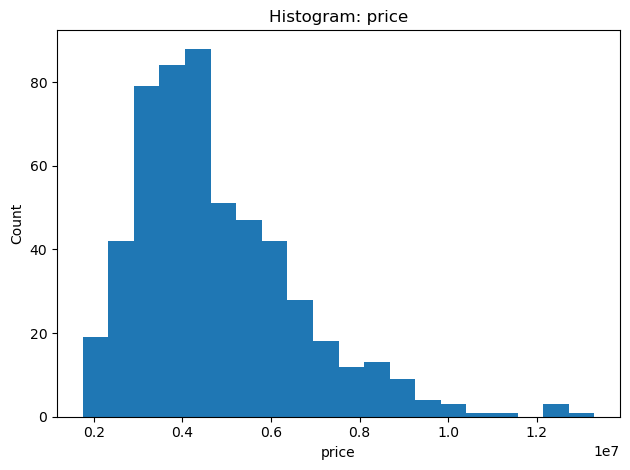

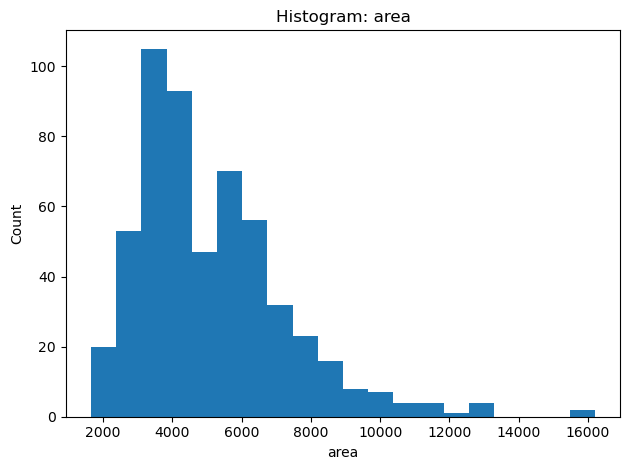

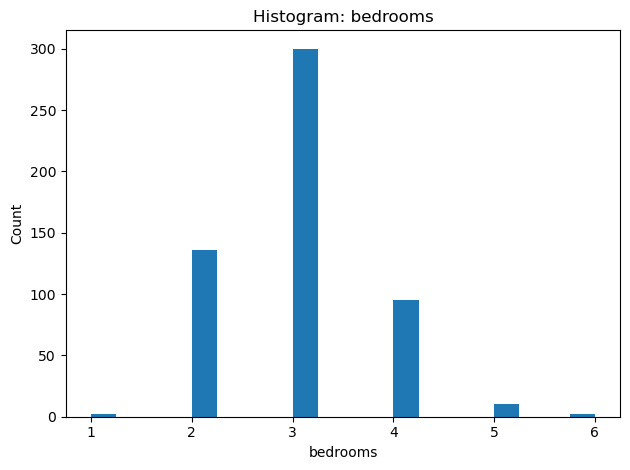

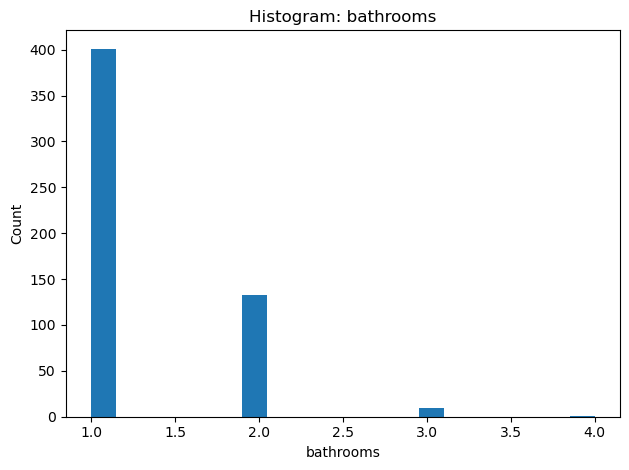

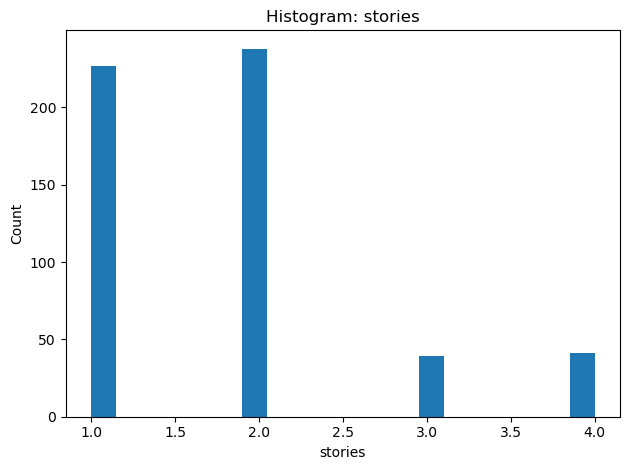

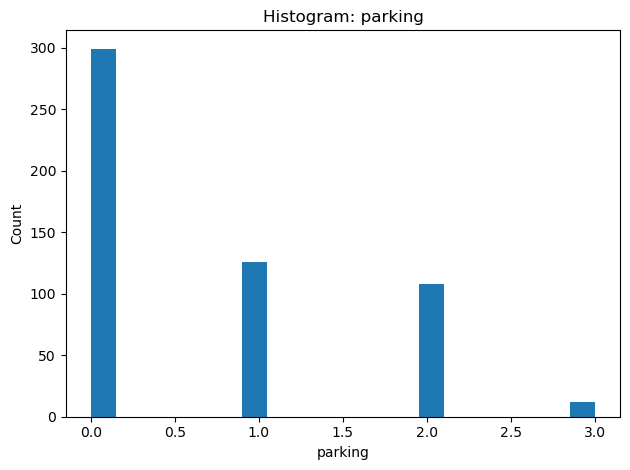

In [41]:
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Histogram: {col}")  
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


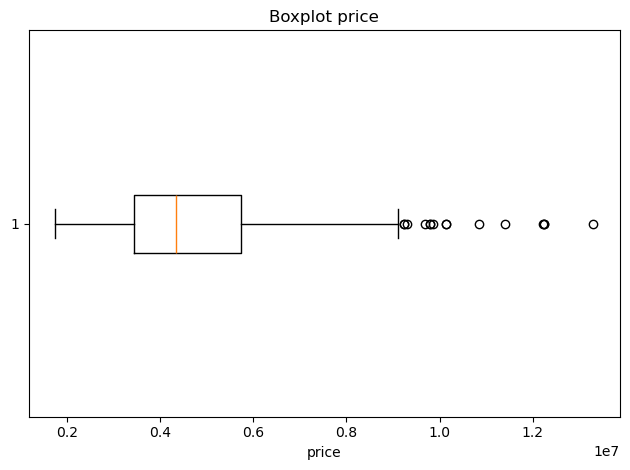

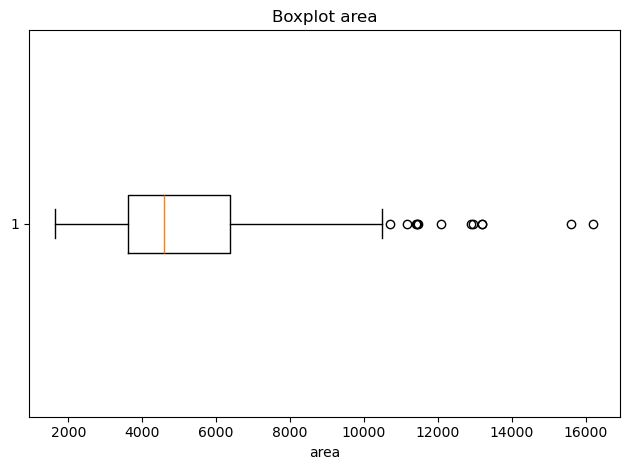

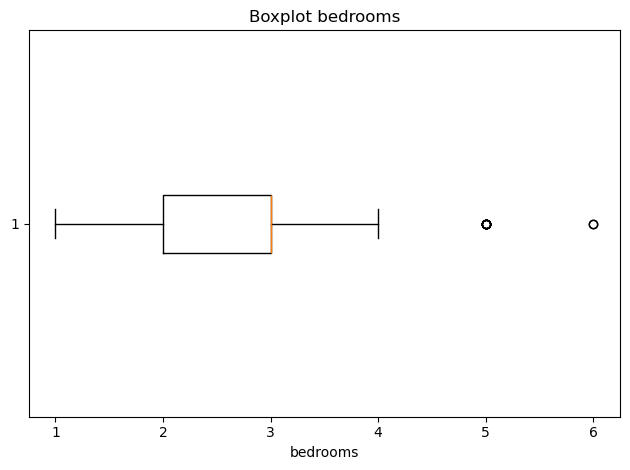

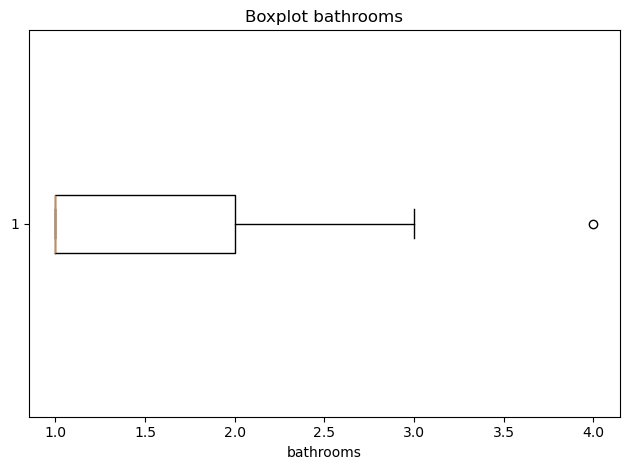

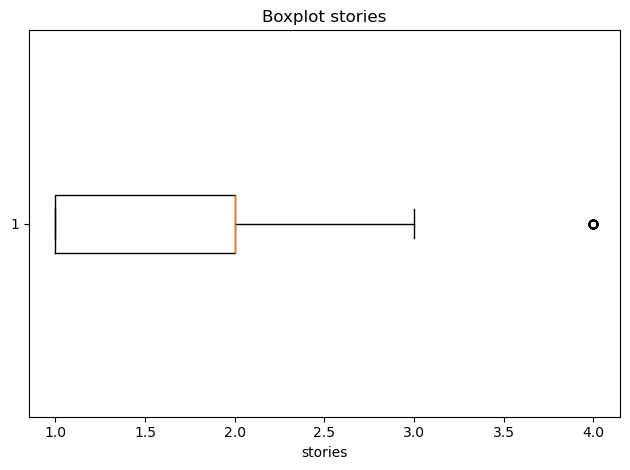

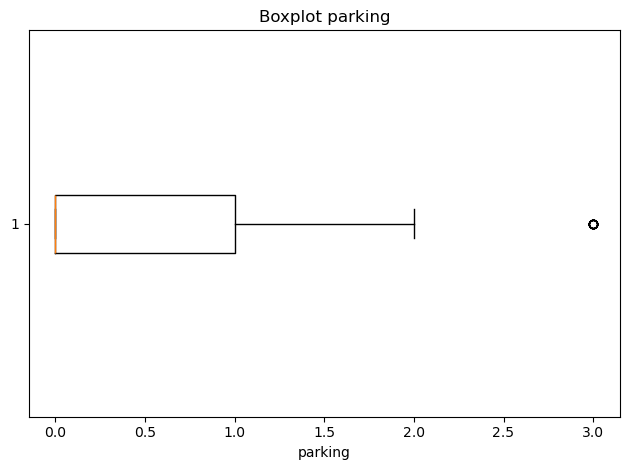

In [43]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot {col}")  
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


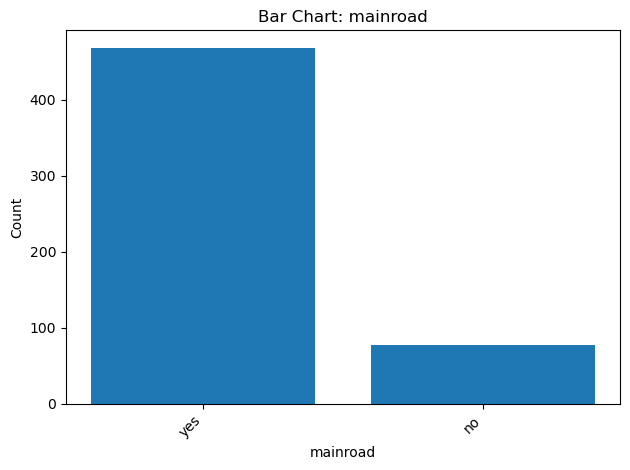

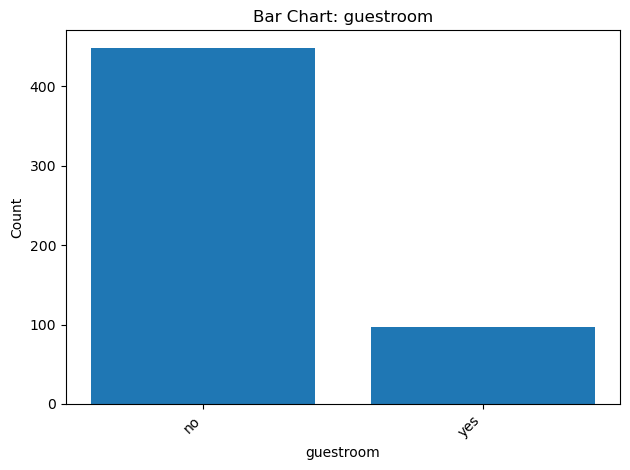

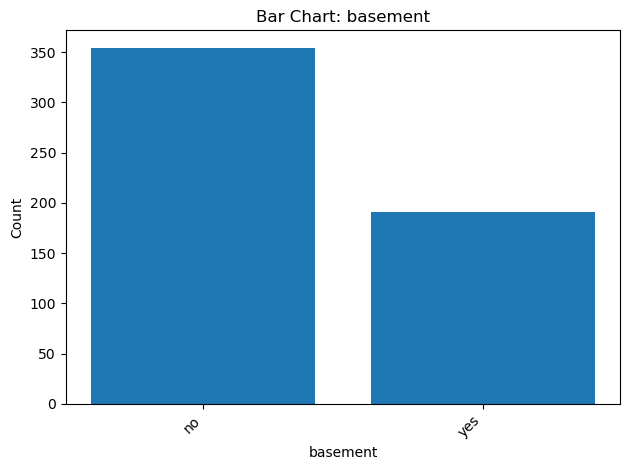

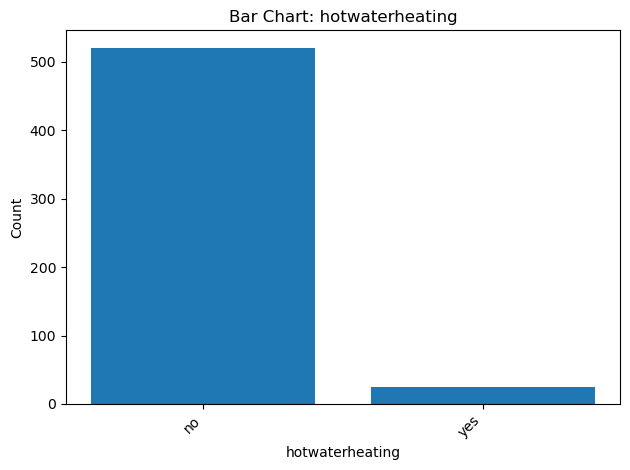

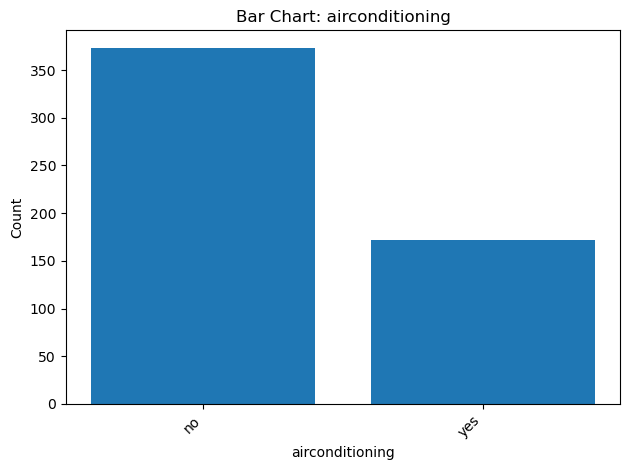

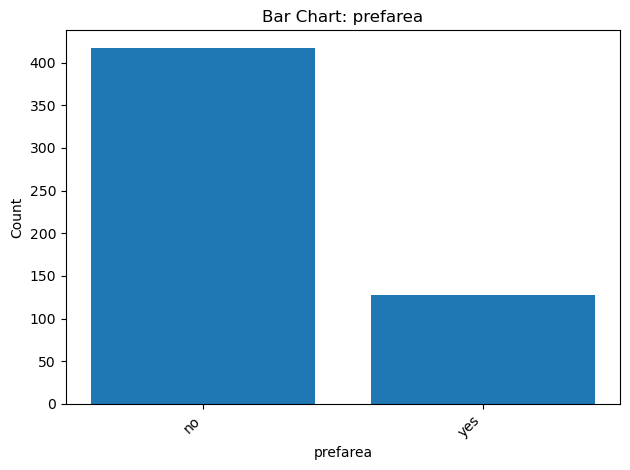

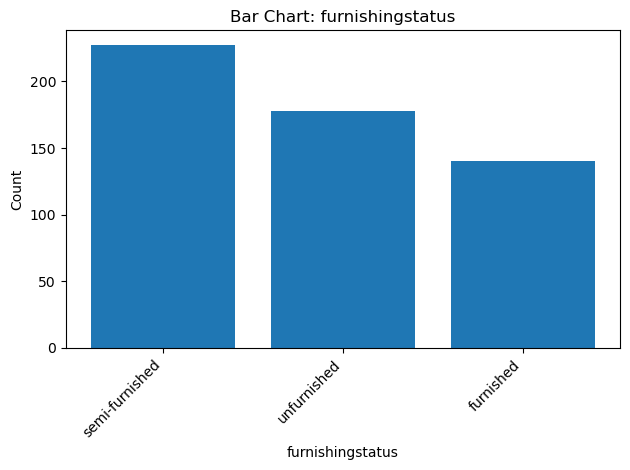

In [45]:
for col in cat_cols:
    counts = df[col].value_counts(dropna=False)
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Bar Chart: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # plt.savefig(out_dir / f"bar_{col}.png", dpi=150)
    plt.show()

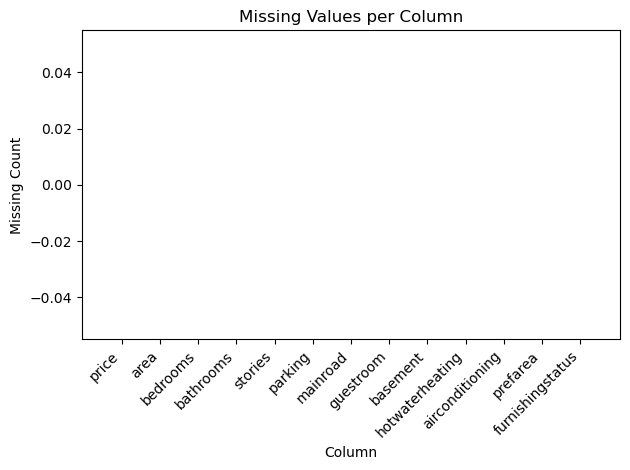

In [47]:
# 8) Missing values overview --------------------------------------
missing = df[num_cols + cat_cols].isna().sum()
plt.figure()
plt.bar(missing.index.astype(str), missing.values)
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Missing Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(out_dir / "missing_values.png", dpi=150)
plt.show()

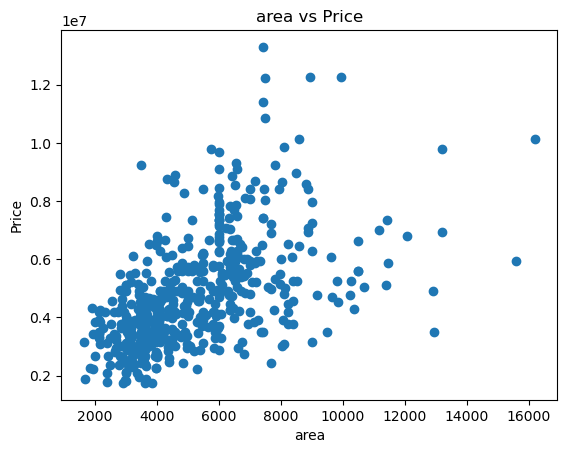

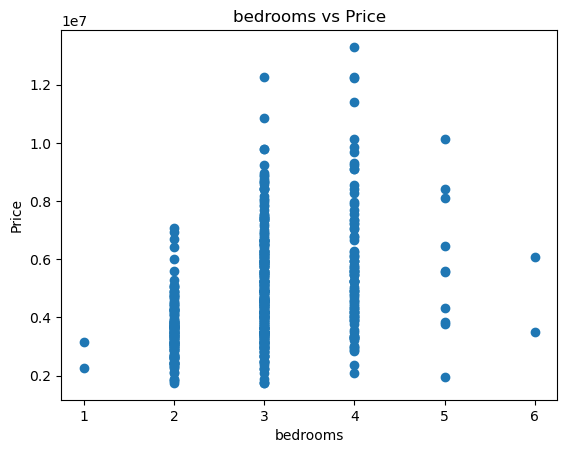

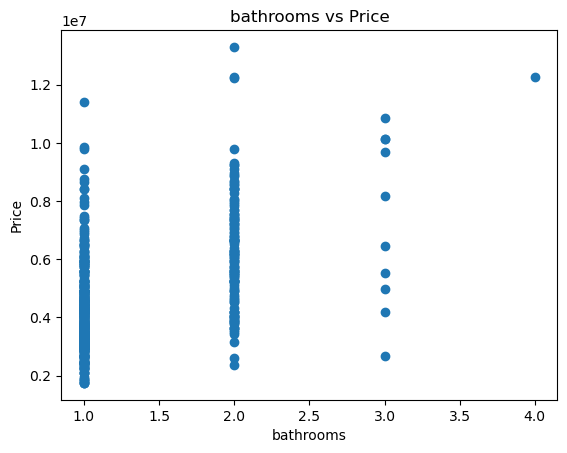

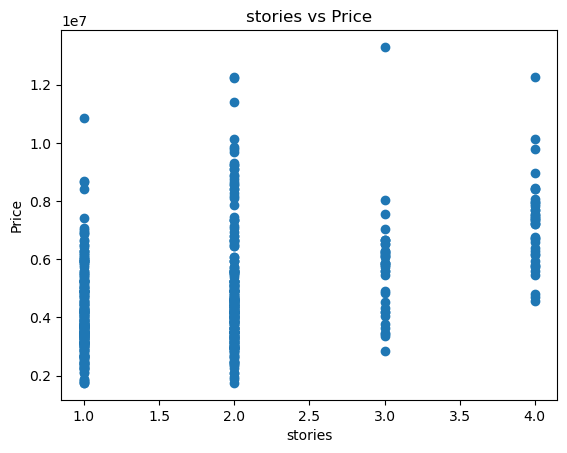

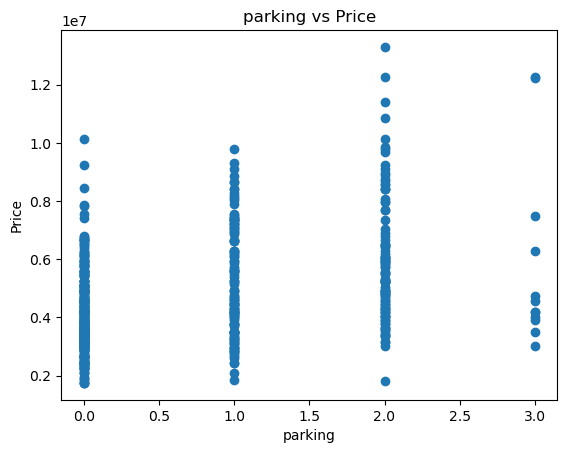

In [49]:
for col in ['area','bedrooms','bathrooms','stories','parking']:
    plt.scatter(df[col], df['price'])
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()


Average price by mainroad:
mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64


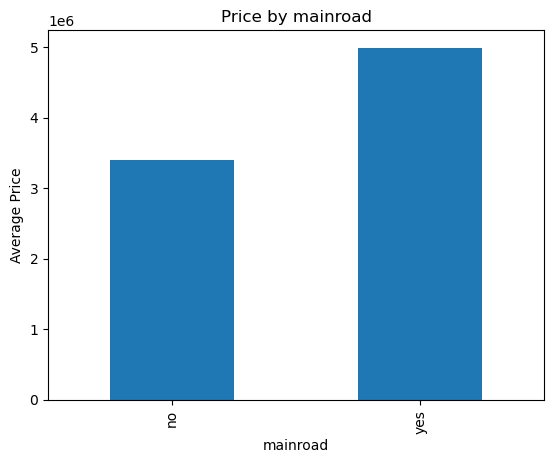


Average price by guestroom:
guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64


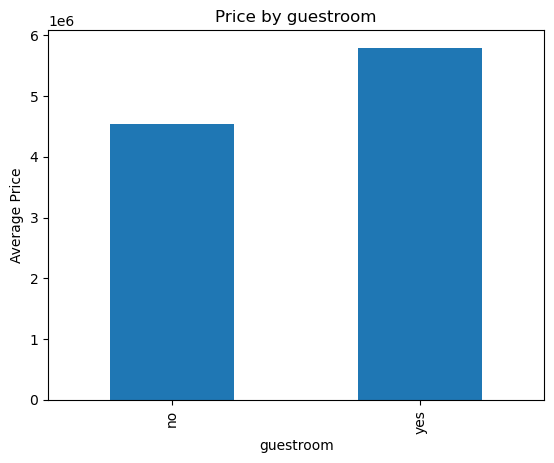


Average price by basement:
basement
no     4.509966e+06
yes    5.242615e+06
Name: price, dtype: float64


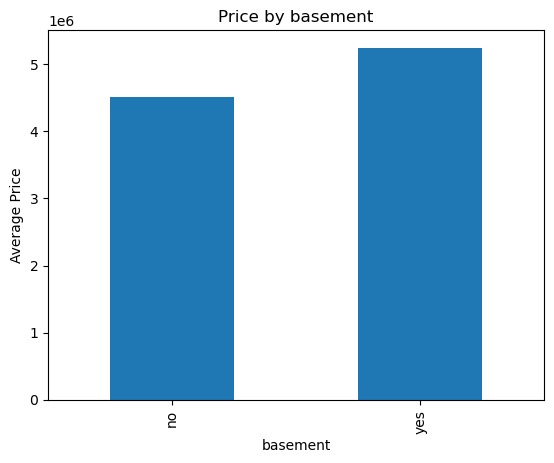


Average price by hotwaterheating:
hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64


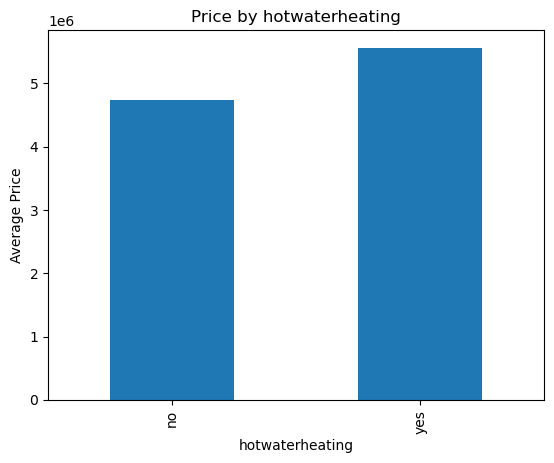


Average price by airconditioning:
airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64


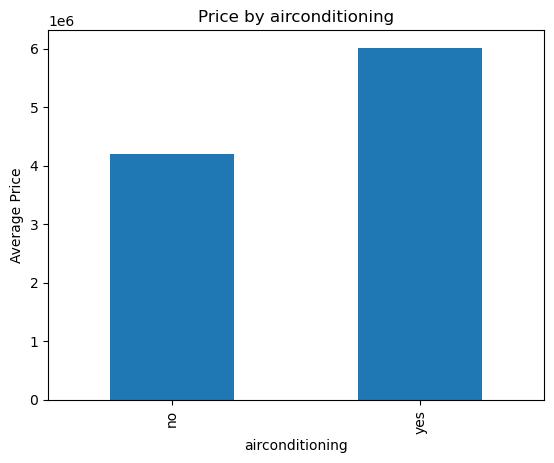


Average price by prefarea:
prefarea
no     4.425299e+06
yes    5.879046e+06
Name: price, dtype: float64


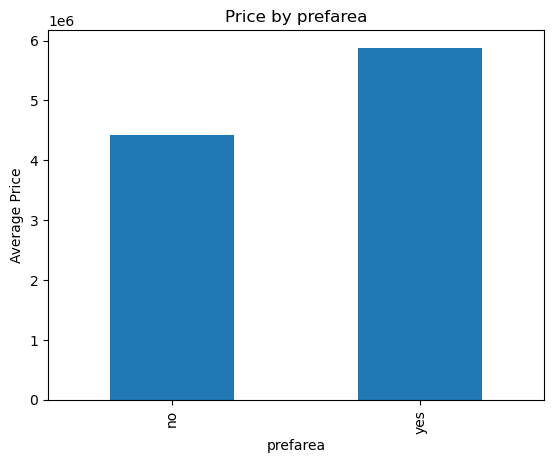


Average price by furnishingstatus:
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


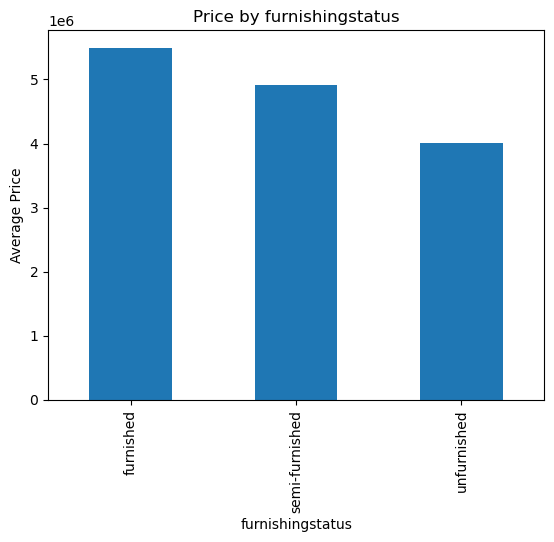

In [51]:
# Categorical vs Target (group means)

for col in cat_cols:

    print(f"\nAverage price by {col}:")

    print(df.groupby(col)['price'].mean())

    df.groupby(col)['price'].mean().plot(kind="bar")

    plt.title(f"Price by {col}")

    plt.ylabel("Average Price")

    plt.show()
 

In [53]:
# Correlation heatmap
corr = df[num_cols].corr()
print("\nCorrelation Matrix:")
print(corr)


Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


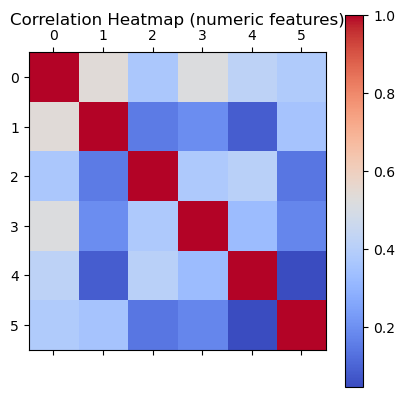

In [55]:
plt.matshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Heatmap (numeric features)", pad=20)
plt.show()

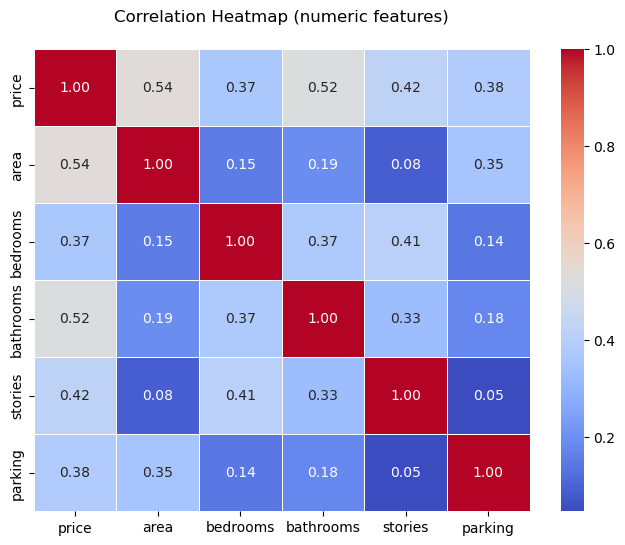

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap with labels
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (numeric features)", pad=20)
plt.show()


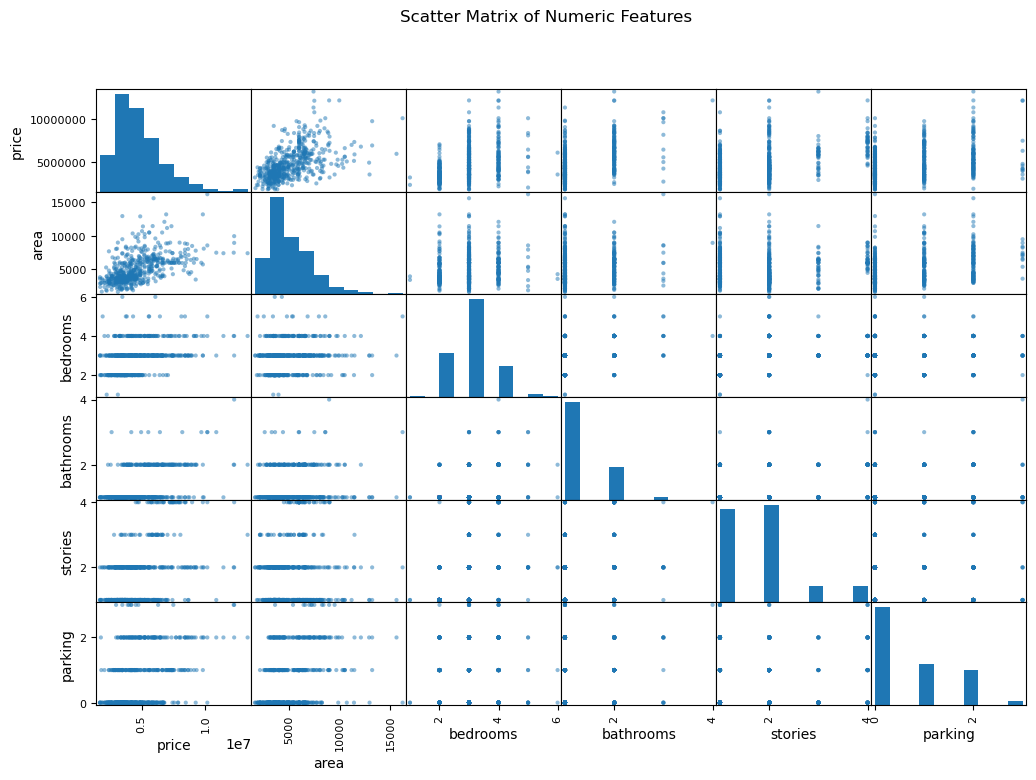

In [59]:
# Scatter matrix (pair plot style)
pd.plotting.scatter_matrix(df[num_cols], figsize=(12, 8), diagonal="hist")
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()